# Registered deaths in Brazil

In [1]:
import datetime
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
warnings.simplefilter(action='ignore')

sns.set(rc={'figure.figsize':(15, 6)})

sns.set_style('white', {
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.right': False,
    'axes.spines.top': False
})

In [3]:
df = pd.read_csv('deaths_brazil.csv')

In [4]:
df.tail()

,year,month,state,deaths
15025,2020,8,RR,86
15026,2020,8,SC,4666
15027,2020,8,SP,31782
15028,2020,8,SE,1452
15029,2020,8,TO,741


In [5]:
df.shape

(15030, 4)

In [7]:
df['date'] = df.apply(lambda r: datetime.date(r[0], r[1], 1), axis=1)

## Comparing deaths from 2019 and 2020

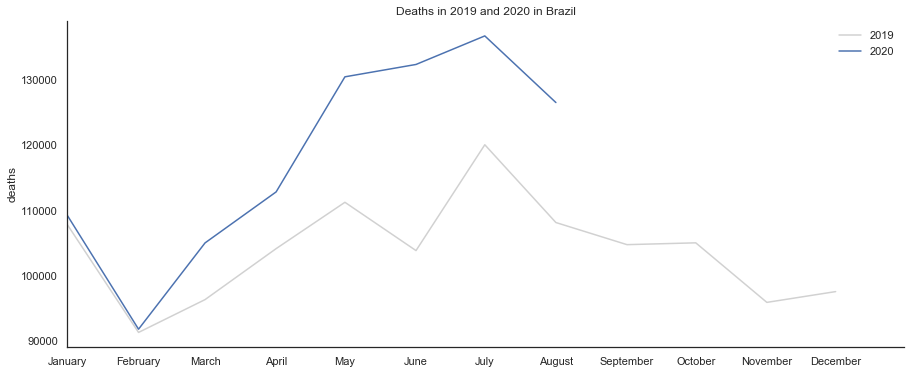

In [32]:
filtered = df[df['year'] > 2018]

filtered['date_year'] = filtered['date'].apply(lambda x: datetime.datetime(2020, x.month, 1))

grouped = filtered.groupby(['year', 'month', 'date_year']).sum().reset_index()

palette[2019] = sns.color_palette('Greys')[1]
palette[2020] = sns.color_palette('deep')[0]

ax = sns.lineplot(x='date_year', y='deaths', data=grouped, hue='year', palette=palette)

ax.legend(ax.get_legend_handles_labels()[0][-2:], ['2019', '2020'], frameon=False)

ax.set_xticklabels(pd.date_range(start='2020-01', freq='M', periods=12).month_name())

plt.xlim(datetime.date(2020, 1, 1), datetime.date(2020, 12, 31))

plt.xlabel('')

plt.title('Deaths in 2019 and 2020 in Brazil')

plt.show()